<a href="https://colab.research.google.com/github/baodt278/baodt278/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

fatal: destination path 'yolov5' already exists and is not an empty directory.
  Using cached GitPython-3.1.43-py3-none-any.whl (207 kB)
  Using cached matplotlib-3.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.2 MB)
  Using cached pillow-10.3.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Using cached psutil-5.9.8-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (288 kB)
  Using cached scipy-1.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 108.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [8]:
%cd /content
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="36CSjE1R3u0fQQjiiaVy")
project = rf.workspace("afrestnguyen").project("citizen-card")
version = project.version(2)
dataset = version.download("yolov5")







/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Citizen-Card-2 in yolov5pytorch:: 100%|██████████| 412/412 [00:00<00:00, 3088.24it/s]


In [9]:
%cd /content/yolov5
!python train.py --img 640 --batch 16 --epochs 60 --data /content/Citizen-Card-2/data.yaml --weights yolov5s.pt


/content/yolov5
2024-04-14 10:14:14.968194: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 10:14:14.968245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 10:14:14.969808: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/Citizen-Card-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, mu

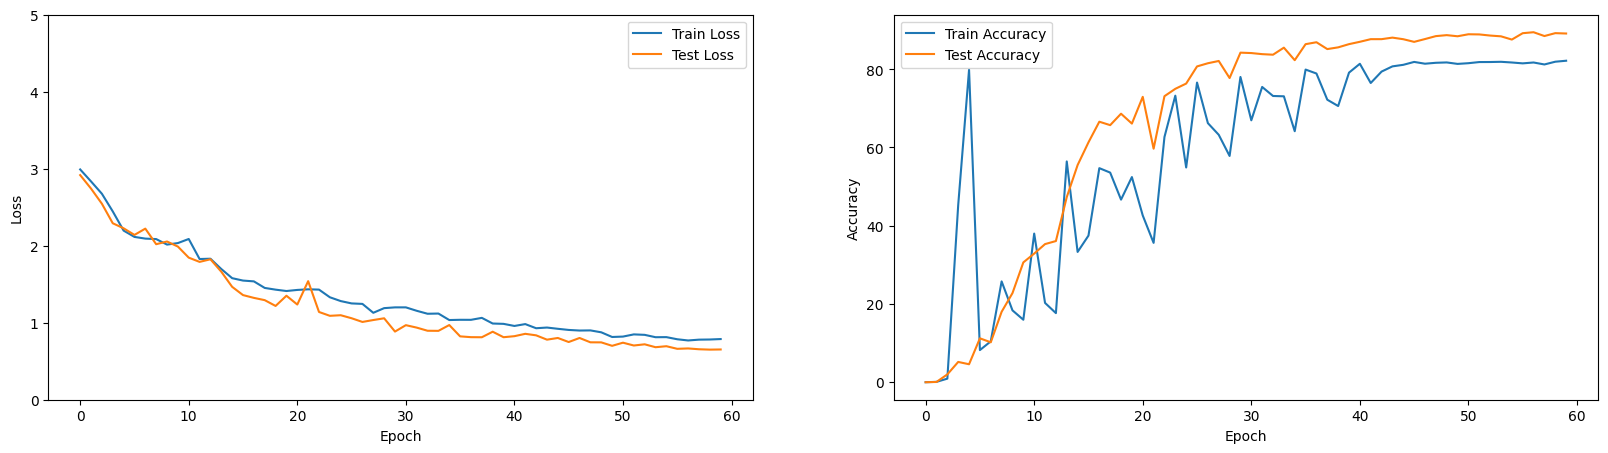

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/yolov5/runs/train/exp2/results.csv')
data['   metrics/precision'] = data['   metrics/precision'] * 100
data['     metrics/mAP_0.5'] = data['     metrics/mAP_0.5'] * 100
data['      train/box_loss'] = data['      train/box_loss'] * 25
data['        val/box_loss'] = data['        val/box_loss'] * 25

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# axs[0].figure(figsize=(10, 5))
axs[0].plot(data['               epoch'], data['      train/box_loss'], label='Train Loss')
axs[0].plot(data['               epoch'], data['        val/box_loss'], label='Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_ylim(0,5)
axs[0].legend()

# axs[1].figure(figsize=(10, 5))
axs[1].plot(data['               epoch'], data['   metrics/precision'], label='Train Accuracy')
axs[1].plot(data['               epoch'], data['     metrics/mAP_0.5'], label='Test Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()

